# Segmentación de clientes (Clustering, Agrupamiento)

## 1. Introducción

En este estudio de caso nos centraremos en la comprension detallada de nuestros clientes, sus habitos de compra y caracteristicas socioeconomicas. Ademas, se llevara a cabo una evaluacion exhaustiva de la situacion actual y la efectividad de nuestras campañas de marketing con el proposito de mejorar la personalizacion del marketing, optimizar la asignacion de recursos, identificar oportunidades de mejora y facilitar la toma de decisiones estrategicas.

La personalizacion del marketing se ha convertido en un factor crucial para el exito. Conocer a fondo a nuestros clientes nos permite ofrecerles productos, servicios y experiencias que se ajusten especificamente a sus necesidades y preferencias, lo que a su vez aumenta la satisfaccion del cliente y lealtad a la marca. Sin embargo, para lograr esta personalizacion efectiva, es fundamental comprender en detalle quienes son nuestros clientes, como se comportan y que los motiva.

Con el objetivo de abordar estos desafios y mejorar nuestra estrategia de merketing, este estudio tiene como objetivo especifico segmentar a nuestros clientes en grupos mas homogéneos segun caracteristicas similares. Ademas, se evaluara el impacto economico de estas segmentaciones y se exploraran posibilidades de eficientizar nuestras campañas de marketing.

**Metodologia**

Para llevar a cabo este estudio, se utilizara un dataset preparado especificamente para este proposito. Este dataset contiene una gama de inofrmacion, incluyendo datos socioeconomicos, canales de compra, respuestas a campañas de marketing, historial de compreas entre otros. Esta informacion nos proporcionará una vision completa y detallada de cada uno de nuestros clientes, permitiendonos identificar patrones, tendencias y segmetarlos de manera mas efectiva.

*Preparación de datos:* Se realizará una limpieza y preparación exhaustiva del dataset para garantizar la calidad y consistencia de los datos.

*Análisis exploratorio de datos:* Se llevará a cabo un análisis exploratorio de los datos para entender mejor la distribución y características de las variables, identificar posibles correlaciones y patrones.

*Segmentación de clientes:* Utilizando kmeans, se agruparán a los clientes en segmentos más homogéneos según características similares.

*Evaluación del impacto económico:* Se evaluará el impacto económico de las segmentaciones, analizando métricas presupuestos de campaña en cada segmento, retorno de la inversion y otros.

*Identificación de oportunidades de mejora:* Se identificarán oportunidades de mejora en la estrategia de marketing, teniendo en cuenta los insights obtenidos de la segmentación y la evaluación del impacto económico.

*Desarrollo de recomendaciones y lineamientos futuros:* Se desarrollarán recomendaciones específicas para mejorar la personalización del marketing, optimizar la asignación de recursos y facilitar la toma de decisiones estratégicas, basadas en los hallazgos del estudio.

### 2.Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

### 3.Carga de datos

In [2]:
df=pd.read_csv('D:/Proyectos portafolio/Data Scientist/Segmentacion de clientes/archive (18)/customers(bronze).csv')
df['Fecha_alta_Cliente']=pd.to_datetime(df['Fecha_alta_Cliente'],format="%d-%m-%Y")
df.head(2)

,ID,Anio_nacim,Educacion,Convive,Ingresos,Niños,Adolescentes,Fecha_alta_Cliente,Dias_ult_compra,Vinos,...,Nro_visitas_mensuales_web,acepto_3ra_campaña,acepto_4ta_campaña,acepto_5ta_campaña,acepto_1ra_campaña,acepto_2da_campaña,Quejas,Costo_por_contacto,Ingreso_por_campaña,Responde_marketing
0,5524,1957,Graduado,Solo,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduado,Solo,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0


### 4.Analisis, exploracion y limpieza

In [4]:
# Agregamos algunas variables que nos serviran en el analisis
df['Edad']=2015-df['Anio_nacim'] # edad de los clientes
df['hijos']=df['Niños']+df['Adolescentes'] # Cantidad total de hijos
df['Gasto']=df['Vinos']+df['Frutas']+df['Carnes']+df['Pescados']+df['Dulces']+df['Oro'] # Monto total gastado por el cliente
df['Int_familia']=df['Convive'].replace({'Solo':1,'Pareja':2})+df['hijos'] # cantidad de integrantes del grupo familiar, padres  e hijos

In [5]:
# nulos
(df.isna().sum()*100/len(df)).sort_values(ascending=False)

Ingresos                     1.071429
ID                           0.000000
Quejas                       0.000000
Nro_visitas_mensuales_web    0.000000
acepto_3ra_campaña           0.000000
acepto_4ta_campaña           0.000000
acepto_5ta_campaña           0.000000
acepto_1ra_campaña           0.000000
acepto_2da_campaña           0.000000
Costo_por_contacto           0.000000
Nro_Compras_catalogo         0.000000
Ingreso_por_campaña          0.000000
Responde_marketing           0.000000
Edad                         0.000000
hijos                        0.000000
Gasto                        0.000000
Nro_Compra_en_tienda         0.000000
Nro_Compras_web              0.000000
Anio_nacim                   0.000000
Nro_Compras_en_oferta        0.000000
Oro                          0.000000
Dulces                       0.000000
Pescados                     0.000000
Carnes                       0.000000
Frutas                       0.000000
Vinos                        0.000000
Dias_ult_com

In [6]:
# Reemplazar nulos en 'Ingresos' por la mediana
df['Ingresos'].fillna(df['Ingresos'].median(),inplace=True)
#duplicados
df.drop_duplicates(inplace=True)

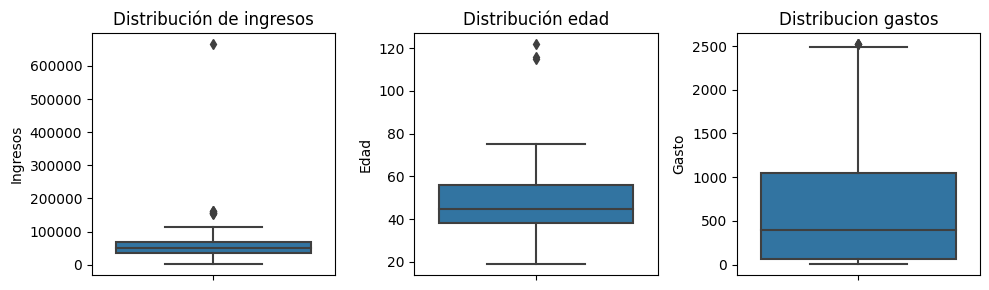

In [7]:
# outliers
fig, axs=plt.subplots(1,3,figsize=(10,3))
sns.boxplot(data=df,y='Ingresos',ax=axs[0])
axs[0].set_title('Distribución de ingresos')
sns.boxplot(data=df,y='Edad', ax=axs[1])
axs[1].set_title('Distribución edad')
sns.boxplot(data=df,y='Gasto',ax=axs[2])
axs[2].set_title('Distribucion gastos')
plt.tight_layout()

In [8]:
#eliminamos ouliers
Q1=df['Ingresos'].quantile(0.25)
Q3=df['Ingresos'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['Ingresos']<(Q3+3*IQR))]
df=df[(df['Edad']<100)]

In [9]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (8, filas * 3))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        plt.tight_layout()

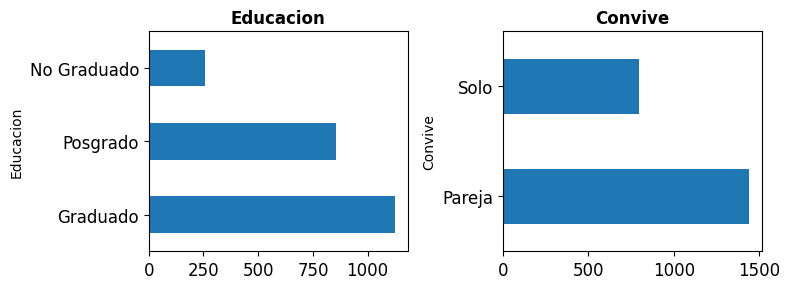

In [10]:
graficos_eda_categoricos(df.select_dtypes('O'))

In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2236.0,5589.008497,0.0,2828.25,5454.5,8421.75,11191.0,3244.826887
Anio_nacim,2236.0,1968.898032,1940.0,1959.0,1970.0,1977.0,1996.0,11.703281
Ingresos,2236.0,51952.614043,1730.0,35502.5,51381.5,68275.75,162397.0,21411.466851
Niños,2236.0,0.444097,0.0,0.0,0.0,1.0,2.0,0.538459
Adolescentes,2236.0,0.506708,0.0,0.0,0.0,1.0,2.0,0.544609
Fecha_alta_Cliente,2236,2013-07-10 05:26:30.697674240,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 00:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Dias_ult_compra,2236.0,49.116279,0.0,24.0,49.0,74.0,99.0,28.957284
Vinos,2236.0,304.12746,0.0,24.0,174.0,504.25,1493.0,336.59181
Frutas,2236.0,26.275939,0.0,1.0,8.0,33.0,199.0,39.724007
Carnes,2236.0,166.983453,0.0,16.0,67.0,232.0,1725.0,225.689645


### 5.Generación de insight

#### 5.1. ¿Qué caracteristicas generales tiene nuestra cartera de clientes?
Analicemos como esta compuesta nuestra poblacion de clientes.

Text(0.5, 1.0, 'Clientes por nivel educativo y estado civil')

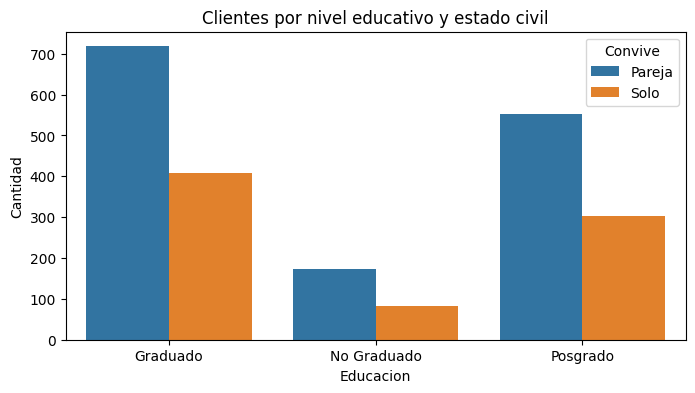

In [12]:
# Clientes por Educación y estado civil
data=pd.DataFrame(df.groupby(['Educacion','Convive'])['Edad'].count()).reset_index()
data.rename(columns={'Edad':'Cantidad'},inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='Educacion',y='Cantidad', hue='Convive', estimator='sum')
plt.title('Clientes por nivel educativo y estado civil')

Edad promedio:46.0


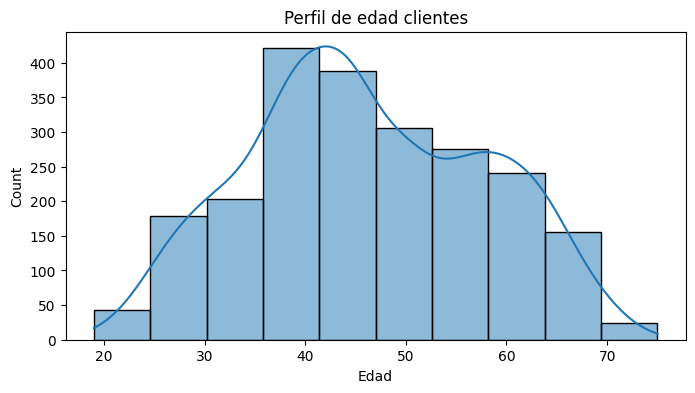

In [13]:
# Por edad de los Clientes
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Edad',bins=10,kde=True)
plt.title('Perfil de edad clientes')
edad_promedio=df['Edad'].mean()
print(f'Edad promedio:{round(edad_promedio,0)}')

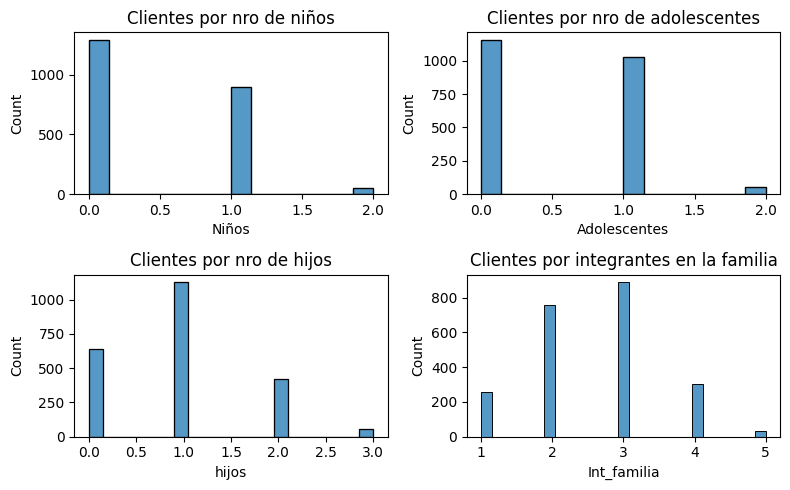

In [15]:
# Analisis por composicion familiar
fig, axs=plt.subplots(2,2,figsize=(8,5))
sns.histplot(data=df,x='Niños',ax=axs[0,0])
axs[0,0].set_title('Clientes por nro de niños')

sns.histplot(data=df,x='Adolescentes', ax=axs[0,1])
axs[0,1].set_title('Clientes por nro de adolescentes')
sns.histplot(data=df,x='hijos',ax=axs[1,0])
axs[1,0].set_title('Clientes por nro de hijos')

sns.histplot(data=df,x='Int_familia', ax=axs[1,1])
axs[1,1].set_title('Clientes por integrantes en la familia')


plt.tight_layout()

Ingreso Promedio: 51953.0


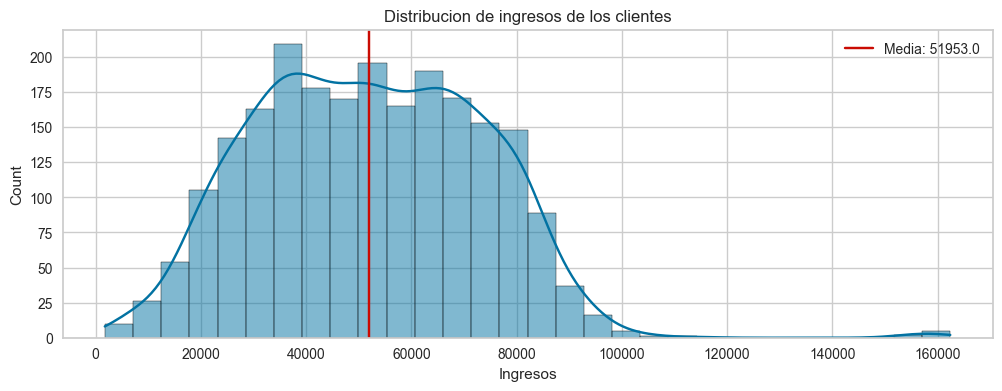

In [53]:
# Analisis por Nivel de ingresos
ing_med=df['Ingresos'].mean()
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='Ingresos',bins=30,kde=True)
plt.axvline(x=ing_med,c='r', label=f'Media: {round(ing_med,0)}')
plt.legend()
plt.title('Distribucion de ingresos de los clientes')
print(f'Ingreso Promedio: {round(ing_med,0)}')

(array([0, 1, 2]),
 [Text(0, 0, 'Nro_Compra_en_tienda'),
  Text(1, 0, 'Nro_Compras_catalogo'),
  Text(2, 0, 'Nro_Compras_web')])

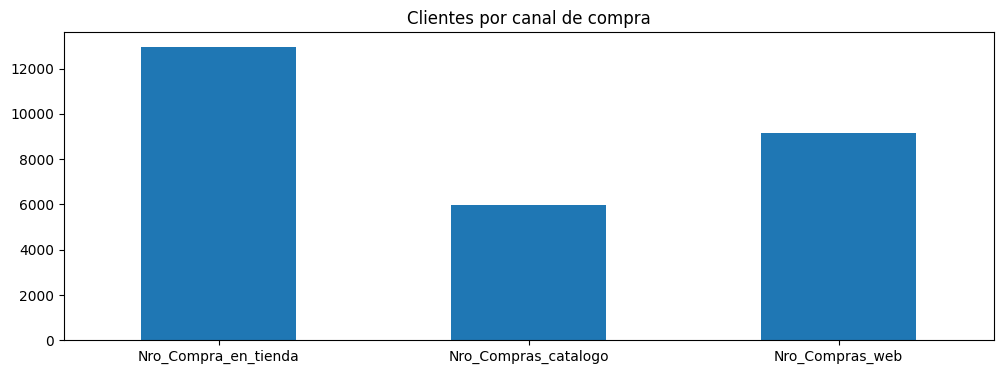

In [17]:
# Analisis por canal mas usado por los clientes
canal=df[['Nro_Compra_en_tienda','Nro_Compras_catalogo','Nro_Compras_web']]
canals=canal.sum()
canals.plot.bar(figsize=(12,4))
plt.title('Clientes por canal de compra')
plt.xticks(rotation=False)

**Caracteristicas generales de nuestra cartera de clientes**

- Nivel de estudio predominante Graduado universitarios, seguidos por clientes que cuentan con algun posgrado, esto
    sugiere que nuestra base de clientes suele ser altamente educada y probablemente valora la calidad y sofisticacion en 
    los productos que ofrece la empresa.
- Mayoritariamente conviven en pareja, esto nos da una pauta de que podriamos enfocar nuestras estrategias de marketing 
    en productos o servicios que sean atractivos para parejas o familias, como ofertas especiales para actividades compartidas.
- La mayoria de los clientes tienen una familia de 3 integrantes. Nos da una pauta para el diseño de promociones y 
    ofertas por cantidad.
- La distribucion del ingresos tiene una media en 51 mil dolares, informacion importante para poder desarrollar una
    estrategia de precios correctamente.
- Normalmente el canal de compra preferida es en tienda. Esto nos ayudaria a priorizar las promociones y disponibilidad
    de productos en las tienda fisicas.

#### 5.2. ¿Cuales son los clientes mas relevantes?
Analicemos en funcion de los volumenes de compra

Text(0.5, 1.0, 'Volumen de compra por nivel educativo y estado civil')

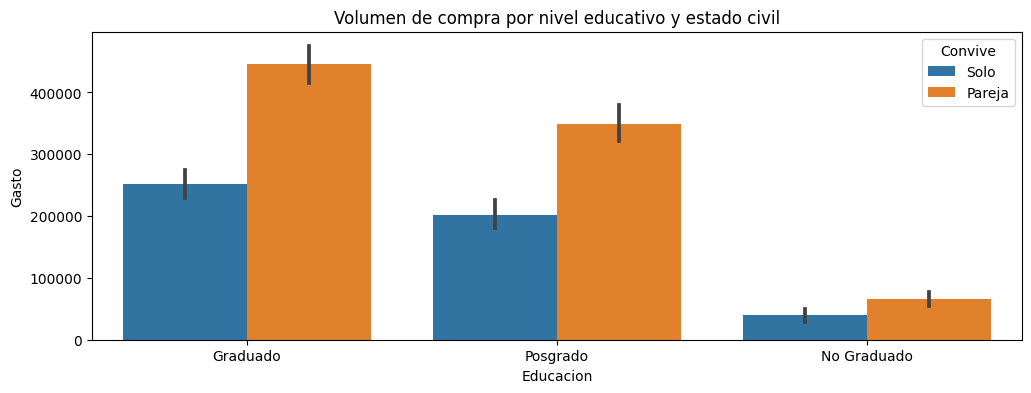

In [18]:
#Analisis de montos de compra por estado civil y nivel educativo
plt.figure(figsize=(12,4))
sns.barplot(data=df,x='Educacion', y='Gasto', hue='Convive', estimator='sum')
plt.title('Volumen de compra por nivel educativo y estado civil')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Vinos'),
  Text(1, 0, 'Frutas'),
  Text(2, 0, 'Carnes'),
  Text(3, 0, 'Pescados'),
  Text(4, 0, 'Dulces'),
  Text(5, 0, 'Oro')])

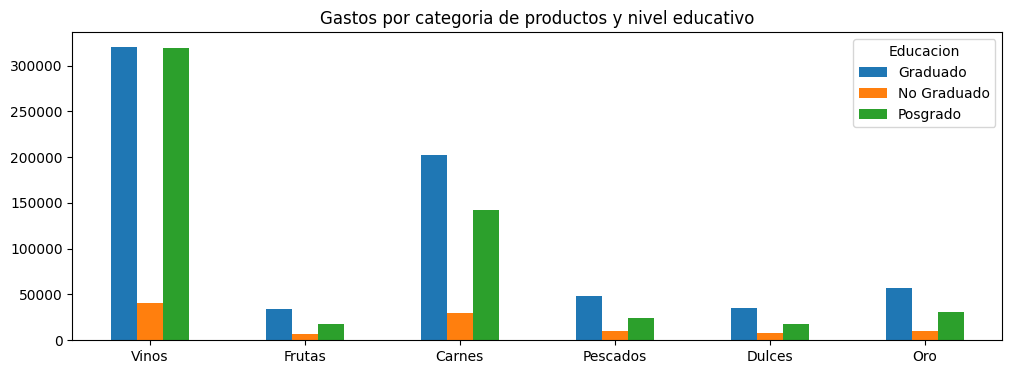

In [21]:
# Veamos las carteras de compra vs nivel educativo
carteras = pd.DataFrame(df.groupby(['Educacion']).agg({'Vinos':'sum',
       'Frutas':'sum', 'Carnes':'sum', 'Pescados':'sum', 'Dulces':'sum',
       'Oro':'sum'}))
carteras.T.plot.bar(figsize=(12,4))
plt.title('Gastos por categoria de productos y nivel educativo')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Vinos'),
  Text(1, 0, 'Frutas'),
  Text(2, 0, 'Carnes'),
  Text(3, 0, 'Pescados'),
  Text(4, 0, 'Dulces'),
  Text(5, 0, 'Oro')])

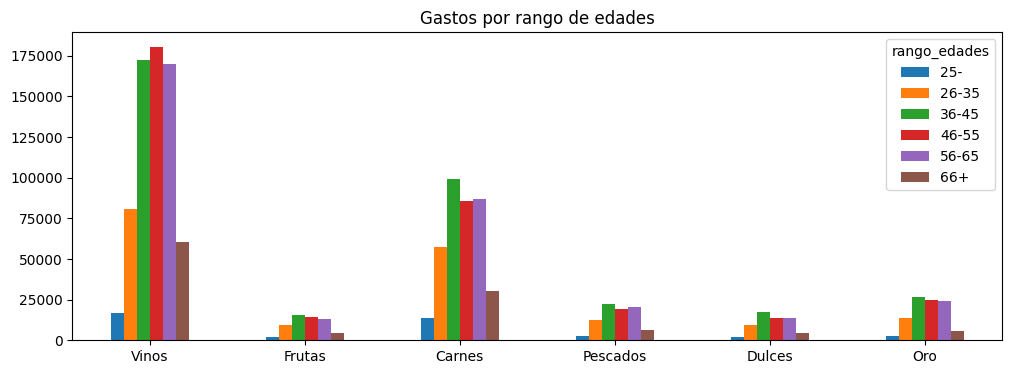

In [20]:
# Cartera de consumo por rango de edad
rango_edades=[18,25,35,45,55,65,100]
categorias=['25-','26-35','36-45','46-55','56-65','66+']
df['rango_edades']=pd.cut(df['Edad'],bins=rango_edades,labels=categorias, right=False)
edades=pd.DataFrame(df.groupby(['rango_edades']).agg({'Vinos':'sum',
       'Frutas':'sum', 'Carnes':'sum', 'Pescados':'sum', 'Dulces':'sum',
       'Oro':'sum'}))
edades.T.plot.bar(figsize=(12,4))
plt.title('Gastos por rango de edades')
plt.xticks(rotation=False)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Vinos'),
  Text(1, 0, 'Frutas'),
  Text(2, 0, 'Carnes'),
  Text(3, 0, 'Pescados'),
  Text(4, 0, 'Dulces'),
  Text(5, 0, 'Oro')])

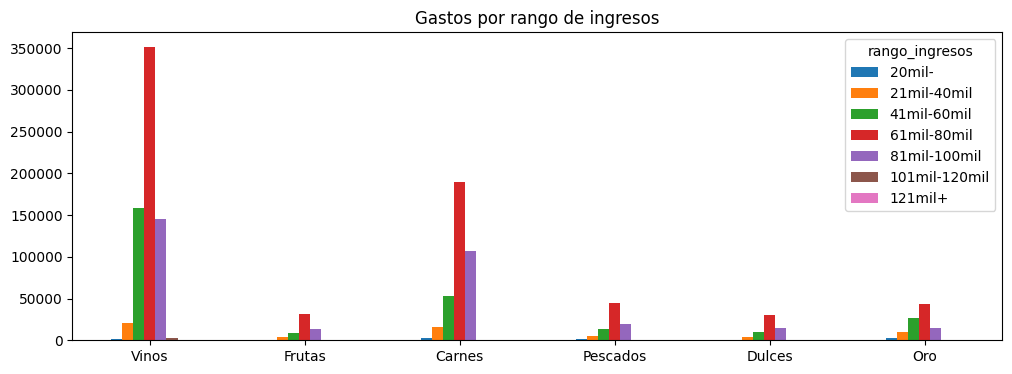

In [22]:
# Cartera de consumo por rango de ingresos
rango_ingresos=[0,20000,40000,60000,80000,100000,120000,140000]
categoria=['20mil-','21mil-40mil','41mil-60mil','61mil-80mil','81mil-100mil','101mil-120mil','121mil+']
df['rango_ingresos']=pd.cut(df['Ingresos'],bins=rango_ingresos,labels=categoria, right=False)
ingres=pd.DataFrame(df.groupby(['rango_ingresos']).agg({'Vinos':'sum',
       'Frutas':'sum', 'Carnes':'sum', 'Pescados':'sum', 'Dulces':'sum',
       'Oro':'sum'}))
ingres.T.plot.bar(figsize=(12,4))
plt.title('Gastos por rango de ingresos')
plt.xticks(rotation=False)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Vinos'),
  Text(1, 0, 'Frutas'),
  Text(2, 0, 'Carnes'),
  Text(3, 0, 'Pescados'),
  Text(4, 0, 'Dulces'),
  Text(5, 0, 'Oro')])

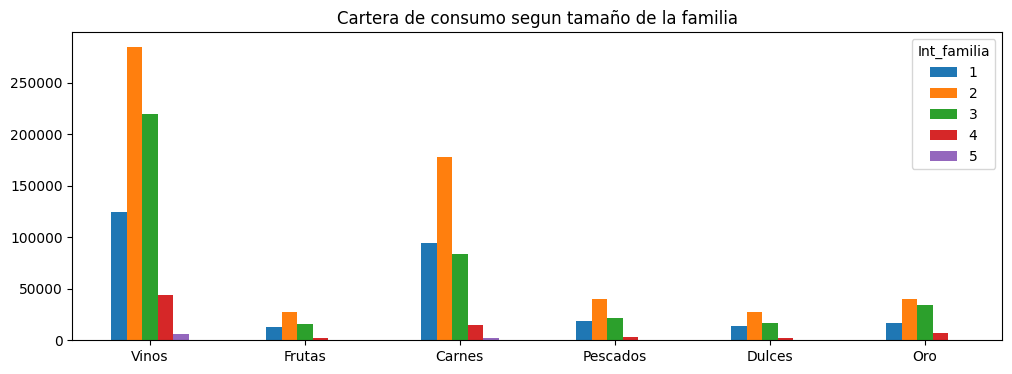

In [23]:
# Carteras de compra por cantidad de integrantes en la familia
tam_fam = pd.DataFrame(df.groupby(['Int_familia']).agg({'Vinos':'sum',
       'Frutas':'sum', 'Carnes':'sum', 'Pescados':'sum', 'Dulces':'sum',
       'Oro':'sum'}))
tam_fam.T.plot.bar(figsize=(12,4))
plt.title('Cartera de consumo segun tamaño de la familia')
plt.xticks(rotation=False)

Correlacion:0.79


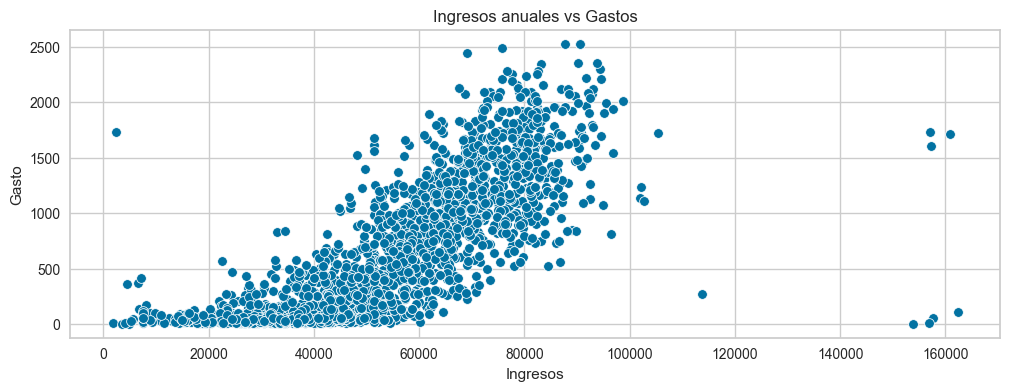

In [268]:
# Volumen Compra vs ingresos
corr=df['Ingresos'].corr(df['Gasto'])
plt.figure(figsize=(12,4))
sns.scatterplot(x='Ingresos',y='Gasto', data=df)
plt.title('Ingresos anuales vs Gastos')
print(f'Correlacion:{round(corr,2)}')

Text(0.5, 1.0, 'Correlacion entre variables')

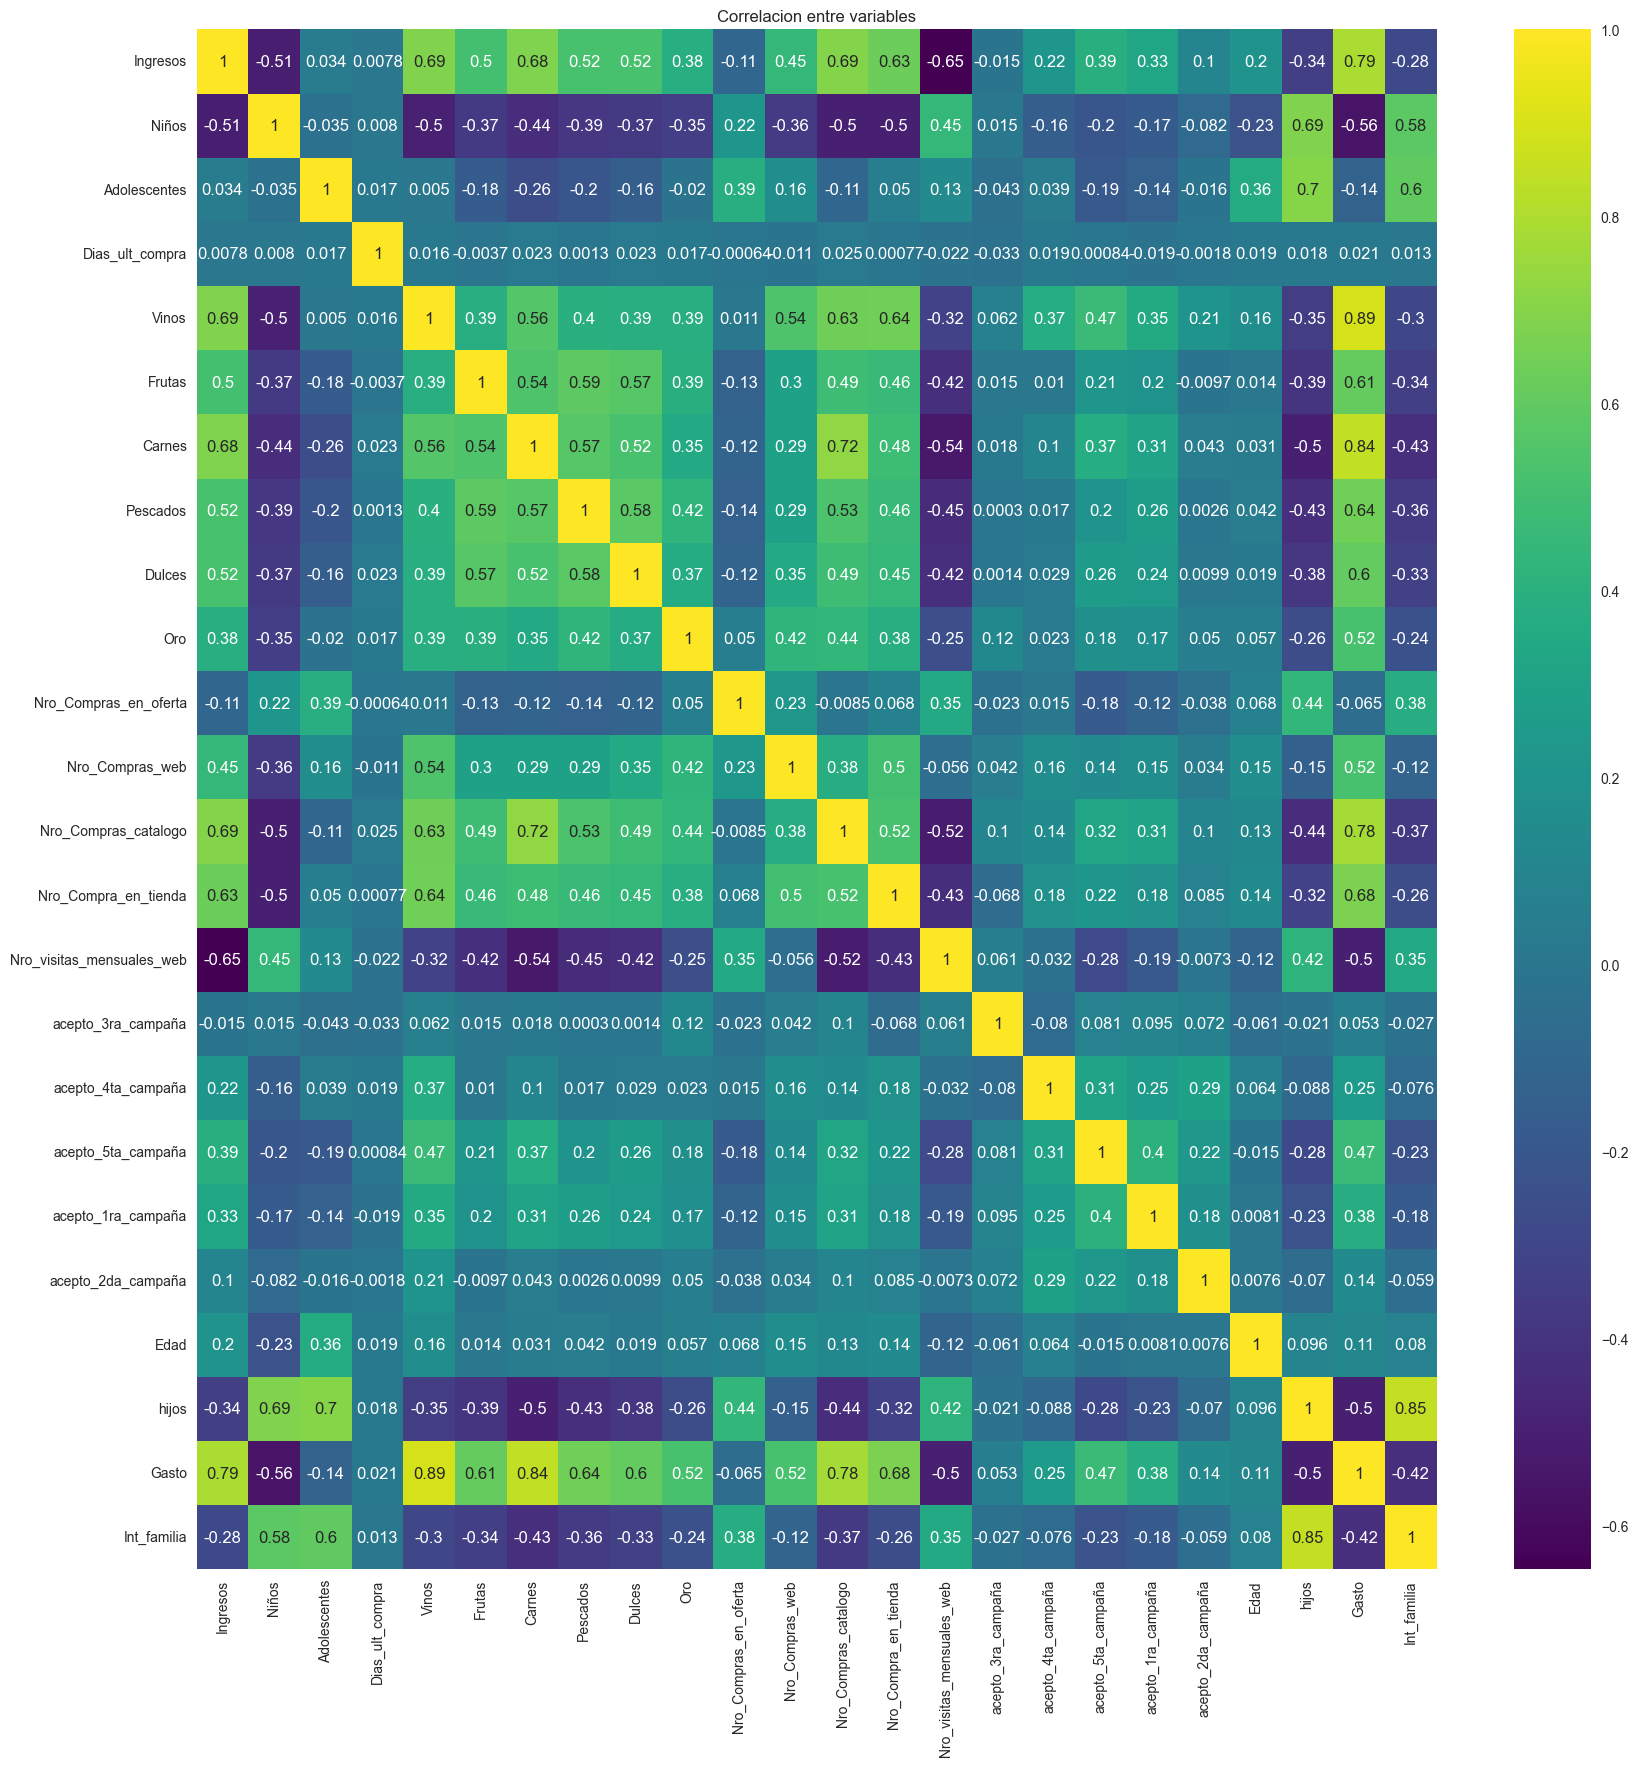

In [269]:
# Correlacion entre variables
var_num=df.select_dtypes('number')
var_num.drop(columns={'ID', 'Anio_nacim','Quejas', 'Costo_por_contacto', 'Ingreso_por_campaña',
       'Responde_marketing'},inplace=True)
varcorr=var_num.corr()
plt.figure(figsize=(20,20))
sns.heatmap(varcorr, annot=True, cmap='viridis')
plt.title('Correlacion entre variables')

**Insights Relevantes en Términos de Volúmenes de Ventas:**

*Clientes Relevantes:* Se destaca la relevancia de las personas en pareja y los graduados universitarios como segmentos clave en nuestra base de clientes.

*Canasta de Productos Más Relevantes:* Los productos de vinos y carne sobresalen como los más relevantes, especialmente entre clientes con educación universitaria.

*Productos por Rango de Edad y Nivel de Ingresos:* Se ha observado un alto volumen de ventas en vinos y carnes entre clientes de entre 35 y 60 años, con ingresos anuales en el rango de USD 60,000 a USD 80,000. Esta segmentación demográfica muestra una preferencia notable por estos productos.

*Volumen de Ventas en Vinos y Carnes en Familias de 2 y 3 Integrantes:* Se evidencia que las familias con 2 y 3 integrantes son las principales consumidoras de vinos y carnes, lo que sugiere una correlación entre el tamaño familiar y las preferencias de compra de estos productos.

*Correlación Entre Ingresos y Volumen de Compra:* Se observa una correlación esperada entre los ingresos y el volumen de compra, lo que indica que a medida que aumentan los ingresos, también lo hace el monto de las compras realizadas.

*Alta Correlación Entre Compras por Catálogo y Gastos en Carnes:* Existe una fuerte correlación entre las compras realizadas a través de catálogo y los gastos en productos cárnicos. Esto sugiere un comportamiento de compra específico entre nuestros clientes, particularmente cuando se trata de productos seleccionados por catálogo.

#### 5.3.¿Que porcentaje de nuestra cartera de clientes tuvo alguna queja de nuestro servicio?
El porcentaje de clientes que en alguna ocasion se quejó de nuestro servicio es menor al 1%

In [545]:
porc = round(df['Quejas'].sum()*100/len(df),2)
print(f'Porcentaje de clientes que realizaron alguna queja: {porc}%')

Porcentaje de clientes que realizaron alguna queja: 0.89%


### 6.Modelado de datos

#### 6.1.Preparación de los datos para la modelización

In [46]:
df_ml=df.copy()
df_ml.drop(columns={'ID','Anio_nacim','Fecha_alta_Cliente','Costo_por_contacto', 'Ingreso_por_campaña',
                    'rango_edades','rango_ingresos'}, inplace=True)

In [25]:
# OneHotEncoder de variables categoricas
from sklearn.preprocessing import LabelEncoder
cat=df_ml.select_dtypes('O')
LEduc=LabelEncoder()
cat_LEduc=pd.DataFrame(LEduc.fit_transform(cat['Educacion']))
cat_LEduc.rename(columns={0:'Educacion'},inplace=True)

LEst=LabelEncoder()
cat_LEst=pd.DataFrame(LEst.fit_transform(cat['Convive']))
cat_LEst.rename(columns={0:'Convive'},inplace=True)
categoricas=pd.concat([cat_LEduc,cat_LEst],axis=1)
categoricas

num=df_ml.select_dtypes('number').reset_index(drop=True)
df_ml=pd.concat([categoricas,num],axis=1)
df1=df_ml.copy()

# Estandarizamos el dataframe a escalas similares
scaler=StandardScaler()
df_ml=pd.DataFrame(scaler.fit_transform(df_ml),columns=scaler.get_feature_names_out(input_features=df_ml.columns))
df_ml.head(2)

,Educacion,Convive,Ingresos,Niños,Adolescentes,Dias_ult_compra,Vinos,Frutas,Carnes,Pescados,...,acepto_4ta_campaña,acepto_5ta_campaña,acepto_1ra_campaña,acepto_2da_campaña,Quejas,Responde_marketing,Edad,hijos,Gasto,Int_familia
0,-0.941488,1.347635,0.288947,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,-1.264308,1.680176,-1.758810
1,-0.941488,1.347635,-0.262003,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,1.395139,-0.962202,0.445618


In [26]:
pca = PCA(n_components = 19, random_state = 42, svd_solver = 'full')
pca.fit(df_ml)
df_pca = pd.DataFrame(pca.transform(df_ml), columns = (['col1', 'col2', 'col3', 'col4','col5', 'col6', 'col7', 'col8',
                                                        'col9', 'col10', 'col11', 'col12','col13', 'col14', 'col15',
                                                        'col16','col17', 'col18', 'col19']))

In [27]:
df_pca.head(2)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19
0,4.611310,-0.721843,-0.343613,1.876378,2.117609,0.337725,0.402399,-0.016064,-0.630176,-0.033993,-0.670540,1.880439,2.042441,-0.959015,-0.382749,0.020858,-0.197911,-0.780981,0.296265
1,-2.825306,0.200416,-0.214563,-0.580544,0.352632,-0.165200,1.817228,0.222825,-1.314861,-1.240896,0.033729,-0.268377,0.378273,0.000349,0.086829,0.140106,0.632142,-0.187484,0.199996


Elbow Method to determine the number of clusters to be formed:


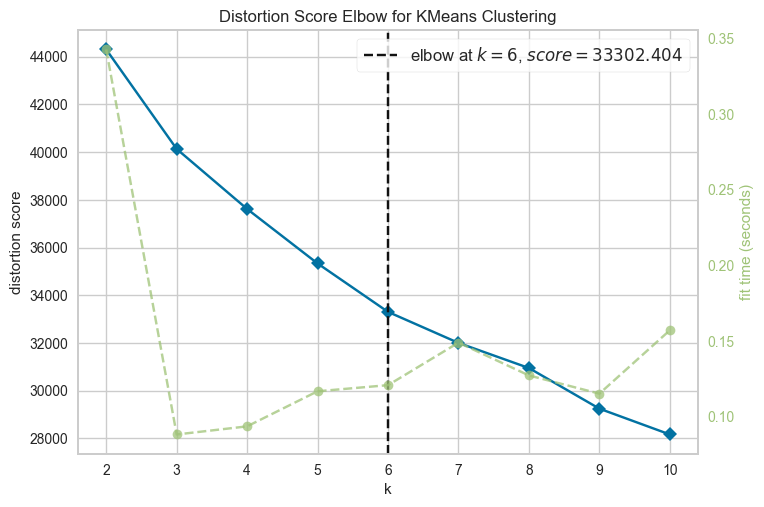

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print("Elbow Method to determine the number of clusters to be formed:")
elbow = KElbowVisualizer(KMeans(), k = 10)
elbow.fit(df_pca)
elbow.show()

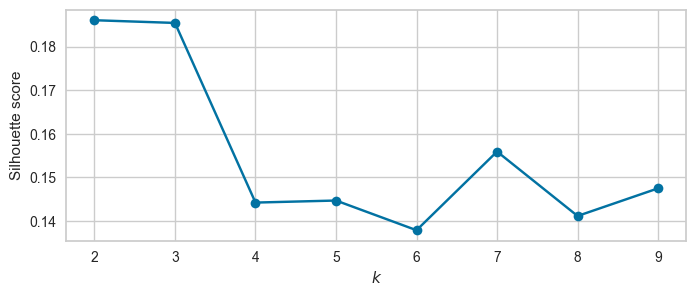

In [66]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(df_pca)
                for k in range(2, 11)]

silhouette_scores = [silhouette_score(df_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

plt.grid(True)

plt.show()

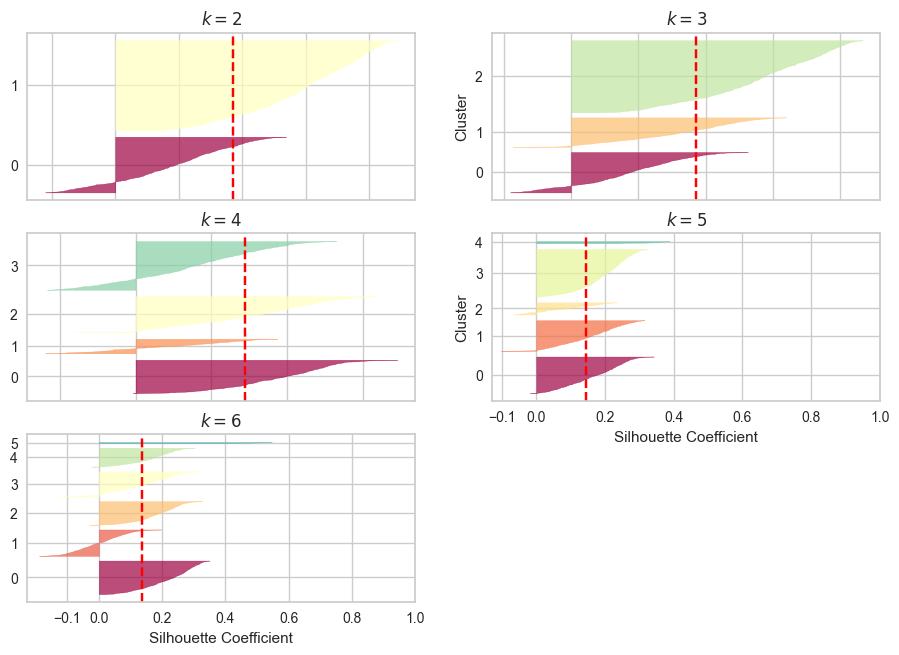

In [67]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 10))

for k in (2, 3, 4, 5, 6):
    plt.subplot(4, 2, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df_pca, y_pred)

    padding = len(df_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

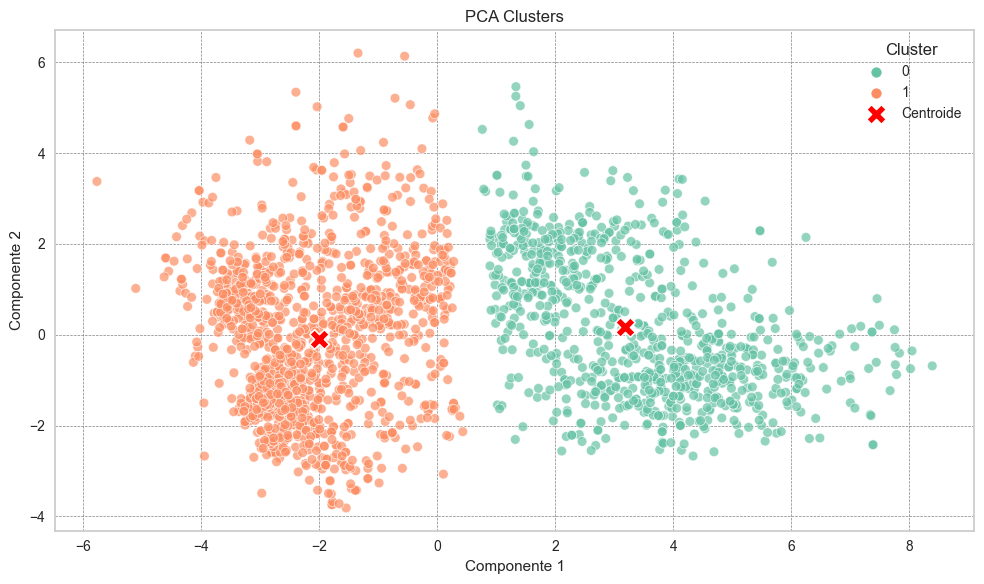

In [68]:
# Graficamos los clusteres

kmeans = KMeans(n_clusters= 2, random_state=42)  #cambio de valores numero cluster
cluster_labels = kmeans.fit_predict(df_pca)
df1['Cluster'] = cluster_labels
df_produccion=df.copy()
df['Cluster']=cluster_labels
df1.to_excel('Clustered_data.xlsx', index = False)


df2 = pd.read_excel('C:/Users/horac/Clustered_data.xlsx')

scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df2)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

df2['PC1'] = pca_data[:, 0]
df2['PC2'] = pca_data[:, 1]


cluster_palette = sns.color_palette("Set2", n_colors = len(df2['Cluster'].unique()))

plt.figure(figsize = (10, 6))

sns.scatterplot(df2, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = cluster_palette, alpha = 0.7)

plt.title("PCA Clusters")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")

plt.grid(True)
plt.tight_layout()


plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker = 'X', s = 200, color = 'red', label = 'Centroide')
plt.legend(title = 'Cluster')


plt.show()

In [69]:
#guardamos el dataframe
df.to_csv('Clusteres.csv', index=False)

In [70]:
df.head(2)

,ID,Anio_nacim,Educacion,Convive,Ingresos,Niños,Adolescentes,Fecha_alta_Cliente,Dias_ult_compra,Vinos,...,Responde_marketing,Edad,hijos,Gasto,Int_familia,rango_edades,rango_ingresos,Cluster,Campañas_aceptadas,mark_acep
0,5524,1957,Graduado,Solo,58138.0,0,0,2012-09-04,58,635,...,1,58,0,1617,1,56-65,41mil-60mil,0,0,NO
1,2174,1954,Graduado,Solo,46344.0,1,1,2014-03-08,38,11,...,0,61,2,27,3,56-65,41mil-60mil,1,0,NO


### 6. Interpretación de resultados

In [71]:
# Para facilitar la interpretacion renombraremos los valores del cluster
df['Cluster']=df.Cluster.map({0:'A',
                                  1:'B'
                                 })
df.head(2)

,ID,Anio_nacim,Educacion,Convive,Ingresos,Niños,Adolescentes,Fecha_alta_Cliente,Dias_ult_compra,Vinos,...,Responde_marketing,Edad,hijos,Gasto,Int_familia,rango_edades,rango_ingresos,Cluster,Campañas_aceptadas,mark_acep
0,5524,1957,Graduado,Solo,58138.0,0,0,2012-09-04,58,635,...,1,58,0,1617,1,56-65,41mil-60mil,A,0,NO
1,2174,1954,Graduado,Solo,46344.0,1,1,2014-03-08,38,11,...,0,61,2,27,3,56-65,41mil-60mil,B,0,NO


Porcentaje A: 38.51%
Porcentaje B: 61.49%
Cluster
A     861
B    1375
Name: ID, dtype: int64


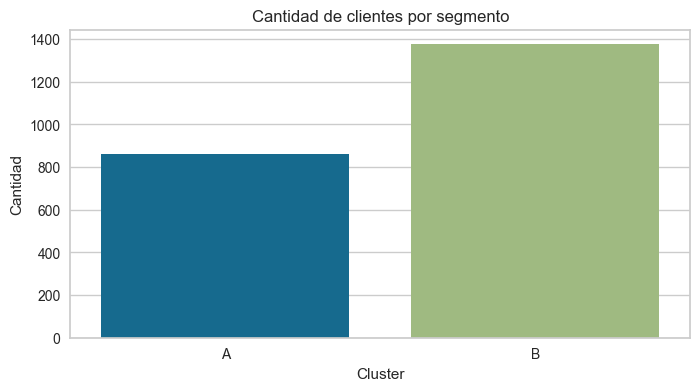

In [72]:
# conteo y proporciones de nuestra cartera
conteo=pd.DataFrame(df.groupby(['Cluster']).count())
porc_A=conteo.ID.iloc[0]*100/df.shape[0]
porc_B=conteo.ID.iloc[1]*100/df.shape[0]
plt.figure(figsize=(8,4))
sns.barplot(x=conteo.index,y='ID', data=conteo)
plt.title('Cantidad de clientes por segmento')
plt.ylabel('Cantidad')
print(f'Porcentaje A: {round(porc_A,2)}%')
print(f'Porcentaje B: {round(porc_B,2)}%')
print(conteo['ID'])

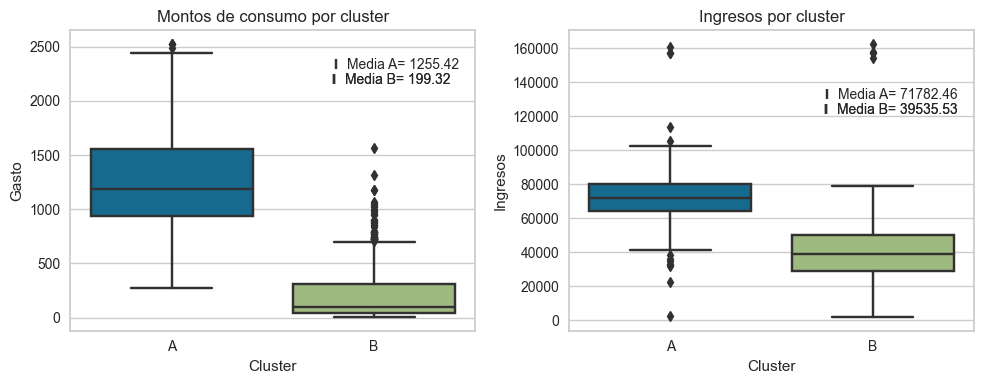

In [73]:
# Analisis de Gastos e ingresos
gasto_mean_A=df[df['Cluster']=='A']['Gasto'].mean()
gasto_mean_B=df[df['Cluster']=='B']['Gasto'].mean()
A_mean_ingresos=df[df['Cluster']=='A']['Ingresos'].mean()
B_mean_ingresos=df[df['Cluster']=='B']['Ingresos'].mean()

fig,axs=plt.subplots(1,2,figsize=(10,4))
sns.boxplot(x='Cluster', y='Gasto', data=df, ax=axs[0])
axs[0].set_title('Montos de consumo por cluster')
leyenda1=axs[0].legend([f'Media A= {round(gasto_mean_A,2)} '],loc='upper right',bbox_to_anchor=(1, 0.95),handlelength=0)
leyenda2=axs[0].legend([f'Media B= {round(gasto_mean_B,2)} '],loc='upper right',bbox_to_anchor=(0.98, 0.90),handlelength=0)
axs[0].add_artist(leyenda1)
axs[0].add_artist(leyenda2)

sns.boxplot(x='Cluster', y='Ingresos', data=df,ax=axs[1])
axs[1].set_title('Ingresos por cluster')
leyenda3=axs[1].legend([f'Media A= {round(A_mean_ingresos,2)} '],loc='upper right',bbox_to_anchor=(1, 0.85),handlelength=False)
leyenda4=axs[1].legend([f'Media B= {round(B_mean_ingresos,2)} '],loc='upper right',bbox_to_anchor=(1, 0.80),handlelength=False)
axs[1].add_artist(leyenda3)
axs[1].add_artist(leyenda4)

plt.tight_layout()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Vinos'),
  Text(1, 0, 'Frutas'),
  Text(2, 0, 'Carnes'),
  Text(3, 0, 'Pescados'),
  Text(4, 0, 'Dulces'),
  Text(5, 0, 'Oro')])

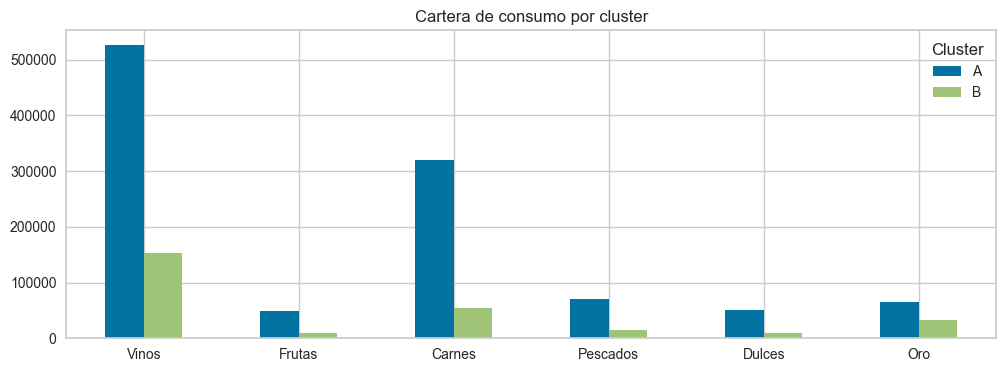

In [74]:
# Veamos las carteras de compra
productos = pd.DataFrame(df.groupby(['Cluster']).agg({'Vinos':'sum',
       'Frutas':'sum', 'Carnes':'sum', 'Pescados':'sum', 'Dulces':'sum',
       'Oro':'sum'}))
productos.T.plot.bar(figsize=(12,4))
plt.title('Cartera de consumo por cluster')
plt.xticks(rotation=False)

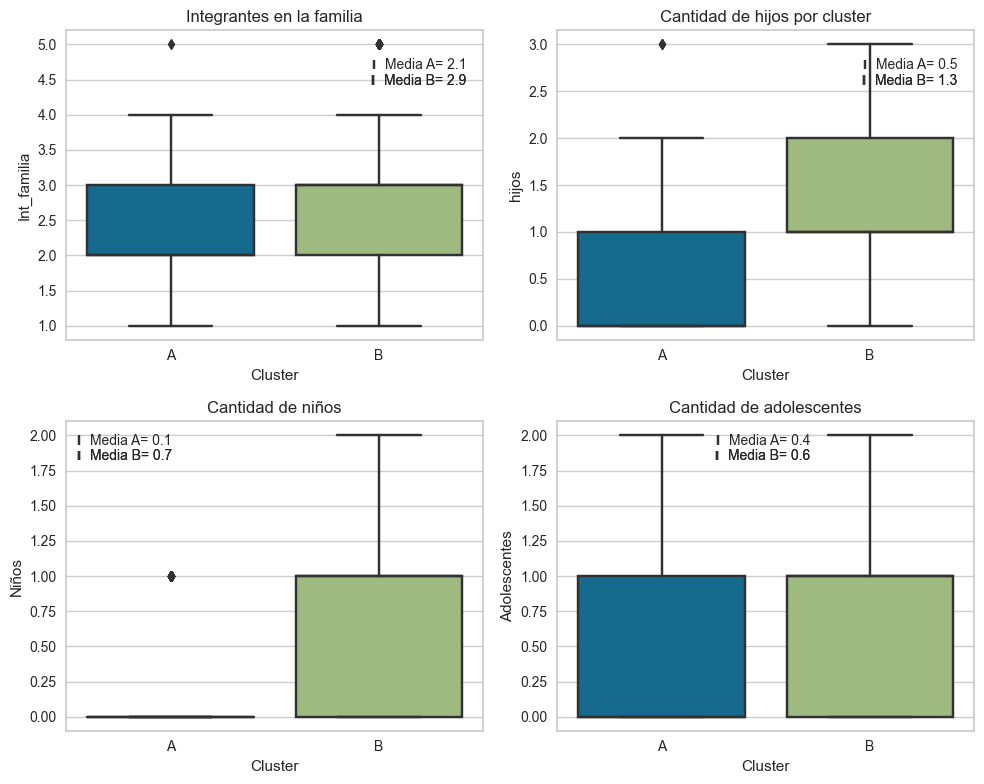

In [75]:
# Analisis de clusters por conformacion del grupo familiar
Int_fam_media_A,Int_fam_media_B=df[df['Cluster']=='A']['Int_familia'].mean(),df[df['Cluster']=='B']['Int_familia'].mean()

A_mean_hijos,B_mean_hijos=df[df['Cluster']=='A']['hijos'].mean(),df[df['Cluster']=='B']['hijos'].mean()

A_mean_niños,B_mean_niños=df[df['Cluster']=='A']['Niños'].mean(),df[df['Cluster']=='B']['Niños'].mean()

A_mean_adole,B_mean_adole=df[df['Cluster']=='A']['Adolescentes'].mean(),df[df['Cluster']=='B']['Adolescentes'].mean()


fig, axs= plt.subplots(2,2,figsize=(10,8))
sns.boxplot(x='Cluster',y='Int_familia', data=df, ax=axs[0,0])
axs[0,0].set_title('Integrantes en la familia')
leyenda1=axs[0,0].legend([f'Media A= {round(Int_fam_media_A,1)} '],loc='upper right',bbox_to_anchor=(1, 0.95),handlelength=0)
leyenda2=axs[0,0].legend([f'Media B= {round(Int_fam_media_B,1)} '],loc='upper right',bbox_to_anchor=(1, 0.90),handlelength=0)
axs[0,0].add_artist(leyenda1)
axs[0,0].add_artist(leyenda2)

sns.boxplot(x='Cluster', y='hijos', data=df,ax=axs[0,1])
axs[0,1].set_title('Cantidad de hijos por cluster')
leyenda3=axs[0,1].legend([f'Media A= {round(A_mean_hijos,1)} '],loc='upper right',bbox_to_anchor=(1, 0.95),handlelength=0)
leyenda4=axs[0,1].legend([f'Media B= {round(B_mean_hijos,1)} '],loc='upper right',bbox_to_anchor=(1, 0.90),handlelength=0)
axs[0,1].add_artist(leyenda3)
axs[0,1].add_artist(leyenda4)

sns.boxplot(x='Cluster', y='Niños', data=df,ax=axs[1,0])
axs[1,0].set_title('Cantidad de niños')
leyenda5=axs[1,0].legend([f'Media A= {round(A_mean_niños,1)} '],loc='upper left',bbox_to_anchor=(0, 1),handlelength=0)
leyenda6=axs[1,0].legend([f'Media B= {round(B_mean_niños,1)} '],loc='upper left',bbox_to_anchor=(0, 0.95),handlelength=0)
axs[1,0].add_artist(leyenda5)
axs[1,0].add_artist(leyenda6)

sns.boxplot(x='Cluster', y='Adolescentes', data=df, ax=axs[1,1])
axs[1,1].set_title('Cantidad de adolescentes')
leyenda7=axs[1,1].legend([f'Media A= {round(A_mean_adole,1)} '],loc='upper center',handlelength=0)
leyenda8=axs[1,1].legend([f'Media B= {round(B_mean_adole,1)} '],loc='upper center',bbox_to_anchor=(0.5, 0.95),handlelength=0)
axs[1,1].add_artist(leyenda7)
axs[1,1].add_artist(leyenda8)

plt.tight_layout()

Text(0.5, 1.0, 'Promociones de marketing aceptadas por cluster')

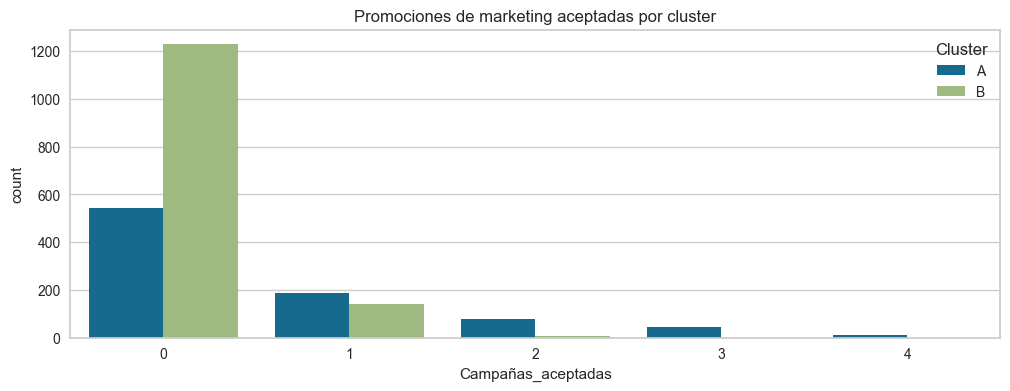

In [76]:
# Analisis por campañas de marketing
df['Campañas_aceptadas']=df['acepto_3ra_campaña']+df['acepto_4ta_campaña']+df['acepto_5ta_campaña']+df['acepto_1ra_campaña']+df['acepto_2da_campaña']
plt.figure(figsize=(12,4))
sns.countplot(df, x='Campañas_aceptadas', hue='Cluster')
plt.title('Promociones de marketing aceptadas por cluster')

(array([0, 1, 2]),
 [Text(0, 0, 'Nro_Compras_web'),
  Text(1, 0, 'Nro_Compras_catalogo'),
  Text(2, 0, 'Nro_Compra_en_tienda')])

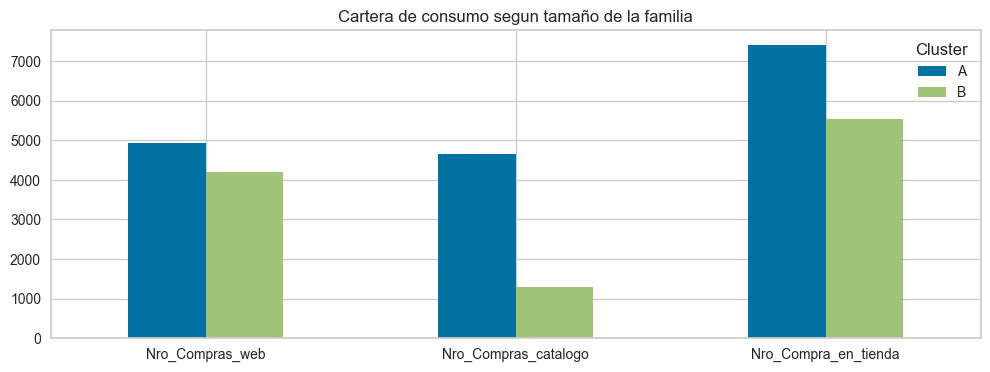

In [77]:
# Analisis por canales de compra
productos = pd.DataFrame(df.groupby(['Cluster']).agg({'Nro_Compras_web':'sum',
       'Nro_Compras_catalogo':'sum', 'Nro_Compra_en_tienda':'sum',}))
productos.T.plot.bar(figsize=(12,4))
plt.title('Cartera de consumo segun tamaño de la familia')
plt.xticks(rotation=False)

Text(0.5, 1.0, 'Compras en oferta')

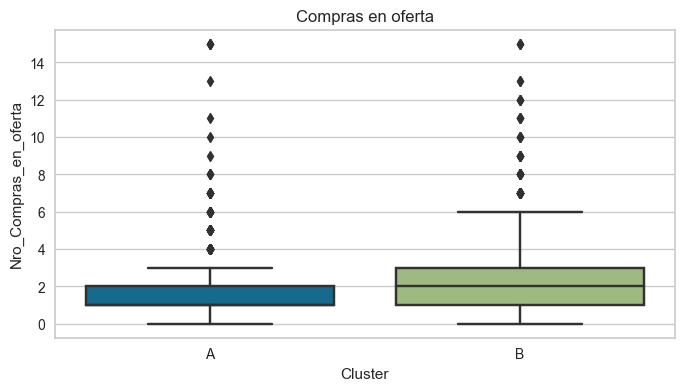

In [78]:
# Analisis por ofertas aprovehadas por los clientes
plt.figure(figsize=(8,4))
sns.boxplot(x='Cluster', y='Nro_Compras_en_oferta', data=df)
plt.title('Compras en oferta')

### 7. Caracteristicas de los clusters
Cluster A:
- Este grupo está compuesto por 861 clientes, lo que representa un 38,51% de la cartera total.
- La media de gasto en compras de este cluster es de USD 1.255.
- El tamaño familiar promedio es de 2 integrantes.
- La mayoría de los clientes en este grupo no tienen hijos.
- El ingreso promedio anual de los clientes de este cluster es de USD 71.782.

Cluster B
- Este cluster está conformado por 1375 clientes, lo que constituye un 61,49% de la cartera total.
- La media de gasto en compras de este grupo es de USD 199.
- En promedio, el tamaño familiar de este cluster es de 3 integrantes.
- Los clientes en este grupo tienen al menos un hijo.
- El ingreso promedio anual de los clientes de este cluster es de USD 39.535.

### 8.Impacto económico
Analizaremos el comportamiento de los clientes a las campañas de marketing y su impacto economico

Text(0.5, 1.0, 'Conteo conversion de las campañas de marketing')

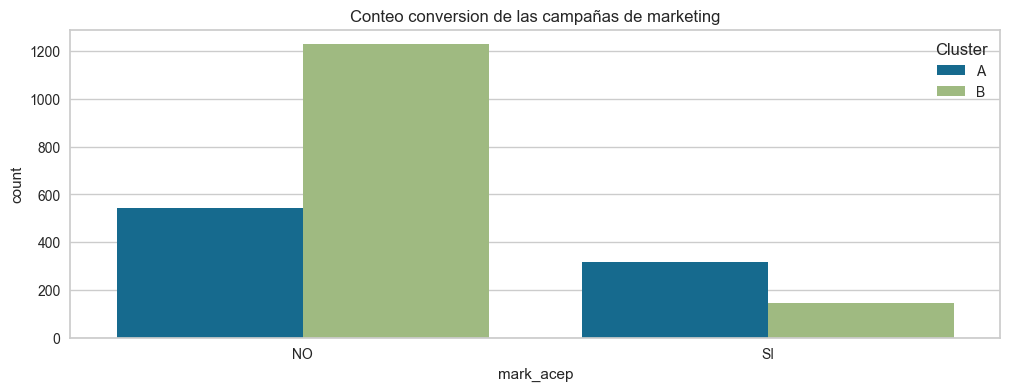

In [79]:
# Efectividad de las campañas de marketing
# Analizamos la cantidad de clientes que aceptaron una campaña de marketing
df['mark_acep']=df['Campañas_aceptadas'].apply(lambda x:'NO' if x==0 else 'SI')
plt.figure(figsize=(12,4))
sns.countplot(df, x='mark_acep', hue='Cluster')
plt.title('Conteo conversion de las campañas de marketing')

In [80]:
#cantidad de clientes que aceptaron una campaña de marketing
aceptacion_campañas=pd.DataFrame(df.groupby(['Cluster','mark_acep'])['ID'].count()).reset_index()
aceptacion_campañas['Porcentage del total']=round(aceptacion_campañas['ID']*100/df.shape[0],2)
aceptacion_campañas.rename(columns={'mark_acep':'Acepto','ID':'Conteo'}, inplace=True)
aceptacion_campañas

,Cluster,Acepto,Conteo,Porcentage del total
0,A,NO,545,24.37
1,A,SI,316,14.13
2,B,NO,1229,54.96
3,B,SI,146,6.53


In [81]:
# Analizamos clientes que responden afirmativamente a una campaña de marketing
tasa_conversion_campaña_A=round(aceptacion_campañas.iloc[1,2]*100/conteo['ID'].iloc[0],2)
tasa_conversion_campaña_B=round(aceptacion_campañas.iloc[3,2]*100/conteo['ID'].iloc[1],2)
print(f'Tasa clientes que responden a campañas cluster A: {tasa_conversion_campaña_A} %')
print(f'Tasa clientes que responden a campañas cluster B: {tasa_conversion_campaña_B} %')

Tasa clientes que responden a campañas cluster A: 36.7 %
Tasa clientes que responden a campañas cluster B: 10.62 %


In [84]:
# Presupuesto para una campaña de marketing para toda la cartera de clientes
# USD 3 es el costo de contacto con cada cliente
# USD 11 por cliente es el asociado por el exito de una campaña
costo_contacto_total=df.shape[0]*3
ingresos_conversion_global=aceptacion_campañas.loc[aceptacion_campañas['Acepto']=='SI','Conteo'].sum()*11
tasa_conversion_global=ingresos_conversion_global*300/(11*costo_contacto_total)
print(f'Costo total de la campaña  USD {costo_contacto_total}')
print(f'Ingresos esperados         USD {ganancia_conversion_global}')
print(f'Tasa Conversion            USD {round(tasa_conversion_global,2)}%')

Costo total de la campaña  USD 6708
Ingresos esperados         USD 5082
Tasa Conversion            USD 20.66%


In [85]:
#Presupuesto para una campaña de marketing optimizada por cluster
costo_contacto_A=aceptacion_campañas.loc[aceptacion_campañas['Cluster']=='A','Conteo'].sum()*3
costo_contacto_B=aceptacion_campañas.loc[aceptacion_campañas['Cluster']=='B','Conteo'].sum()*3
ingresos_por_exito_A=aceptacion_campañas.loc[(aceptacion_campañas['Acepto']=='SI')&(aceptacion_campañas['Cluster']=='A'),
                                             'Conteo'].sum()*11
ingresos_por_exito_B=aceptacion_campañas.loc[(aceptacion_campañas['Acepto']=='SI')&(aceptacion_campañas['Cluster']=='B'),
                                             'Conteo'].sum()*11

tasa_conversion_campaña_A=round(aceptacion_campañas.iloc[1,2]*100/conteo['ID'].iloc[0],2)
tasa_conversion_campaña_B=round(aceptacion_campañas.iloc[3,2]*100/conteo['ID'].iloc[1],2)
print('Cluster A\n')
print(f'Presupuesto campaña: {costo_contacto_A}')
print(f'Ingresos esperados: {ingresos_por_exito_A}')
print(f'Tasa conversion: {tasa_conversion_campaña_A} %\n\n')

print('Cluster B\n')
print(f'Presupuesto campaña: {costo_contacto_B}')
print(f'Ingresos esperados: {ingresos_por_exito_B}')
print(f'Tasa conversion: {tasa_conversion_campaña_B} %')

Cluster A

Presupuesto campaña: 2583
Ingresos esperados: 3476
Tasa conversion: 36.7 %


Cluster B

Presupuesto campaña: 4125
Ingresos esperados: 1606
Tasa conversion: 10.62 %


In [86]:
# Retomando preguntas ¿Cuales son nuestros clientes mas relevantes?
Volumen_compra_total=df['Gasto'].sum()
Volumen_compra_A=df.loc[df['Cluster']=='A','Gasto'].sum()
Volumen_compra_B=df.loc[df['Cluster']=='B','Gasto'].sum()
porc_ventas_A=round(Volumen_compra_A*100/Volumen_compra_total,2)
porc_ventas_B=round(Volumen_compra_B*100/Volumen_compra_total,2)

print(f'Volumen de compra Cluster A: USD {Volumen_compra_A}')
print(f'Porcentaje: {porc_ventas_A}%\n')
print(f'Volumen de compra Cluster B: USD {Volumen_compra_B}')
print(f'Porcentaje: {porc_ventas_B}%')

Volumen de compra Cluster A: USD 1080917
Porcentaje: 79.77%

Volumen de compra Cluster B: USD 274069
Porcentaje: 20.23%


### 9.Conclusiones

**Características Generales de Nuestra Cartera de Clientes:**
- Nivel Educativo Predominante:

Se destaca que la mayoría de nuestros clientes son graduados universitarios, seguidos por aquellos con algún posgrado. Esta característica sugiere que nuestra base de clientes tiende a ser altamente educada, lo que posiblemente influya en su valoración por productos de calidad y sofisticación.

- Composición Familiar:

La mayoría de nuestros clientes conviven en pareja, lo que indica una posible oportunidad para enfocar estrategias de marketing en productos o servicios orientados a parejas o familias, como ofertas especiales para actividades compartidas.
Asimismo, la mayor parte de nuestros clientes tienen una familia de 3 integrantes, lo que sugiere la conveniencia de diseñar promociones y ofertas por cantidad que se ajusten a esta composición familiar predominante.

- Distribución de Ingresos:

La distribución de ingresos tiene una media en 51 mil dólares, información vital para desarrollar una estrategia de precios efectiva que se alinee con la capacidad adquisitiva de nuestros clientes.

- Canal de Compra Preferido:

El canal de compra preferido por nuestros clientes es en tienda, lo que nos indica la importancia de priorizar las promociones y la disponibilidad de productos en nuestras tiendas físicas.

- Quejas de Clientes:

Un bajo porcentaje, equivalente al 0.89%, de nuestros clientes ha realizado alguna queja en el pasado. Esto sugiere una satisfacción generalizada con nuestros productos y servicios.


**Clusters**

- *El Cluster A*, compuesto por 861 clientes, representa el 38.51% de nuestra cartera. Estos clientes tienen un mayor ingreso promedio anual (USD 71782) y un mayor gasto en compras, lo que los convierte en un segmento clave en términos de volumen de ventas(79% del volumen total de compras).

- Por otro lado, *el Cluster B*, conformado por 1375 clientes, constituye el 61.49% del total de clientes. Aunque tienen un ingreso promedio anual menor (USD 39535) y un gasto en compras más bajo (20% del volumen de compras), representan una parte significativa de nuestras ventas totales.

**Optimización de Campañas:**
Para la optimización de campañas, se sugiere asignar un presupuesto mayor al Cluster A, dado su mayor potencial de conversión y volumen de ventas.
Para el Cluster A, con un presupuesto de campaña de USD 2583, se espera obtener ingresos esperados de USD 3476, con una tasa de conversión del 36.7%.
Mientras que para el Cluster B, con un presupuesto de campaña de USD 4125, se esperan ingresos de USD 1606, con una tasa de conversión del 10.62%.

### 10. Recomendaciones

**Enfoque en Segmento A:**

Se recomienda centrar los esfuerzos de marketing y promoción en el Cluster A, dada su mayor capacidad de generación de ingresos y su alta tasa de conversión.

**Personalización de Ofertas:**

Diseñar ofertas y promociones específicas que se ajusten a las preferencias y necesidades de cada segmento de clientes, aprovechando los insights obtenidos sobre los productos más relevantes y las características demográficas de cada grupo.

**Mejora Continua:**

Es importante realizar un seguimiento continuo y análisis de los resultados de las campañas de marketing, así como de los cambios en las características y comportamientos de nuestros clientes, para adaptar nuestras estrategias de manera efectiva y mantenernos competitivos en el mercado. Seria interesante realizar un sistema de scoring de los clientes para ordenarlos por mayor probabilidad de conversión